In [237]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sympy as sym
import pandas as pd

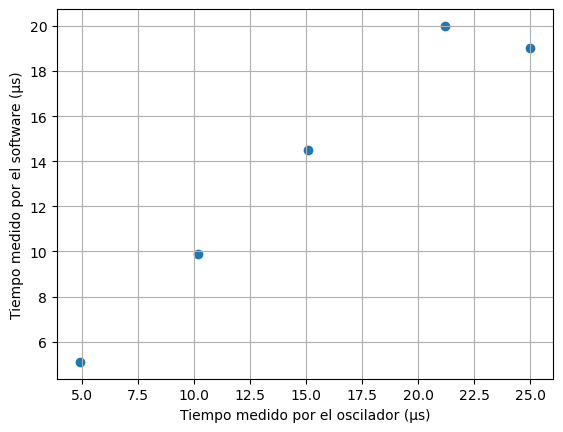

In [238]:
t_detect = [5.1,9.9,14.5,20,19]
t_osc =  [4.9,10.2,15.1,21.2,25]

plt.scatter(t_osc, t_detect)
plt.xlabel("Tiempo medido por el oscilador (μs)")
plt.ylabel("Tiempo medido por el software (μs)")
plt.grid(which = "major")

In [239]:
def expfunction(x,A,B,C):
    return A*np.exp(-B*x)+C

def expfunction2(x,A,B):
    return A*np.exp(-B*x)

In [240]:
DataFrame1 = pd.read_csv('24-10-15-11-21.data', usecols=[0], names=['time_rawdata'], sep=' ')
DataFrame1 = DataFrame1[DataFrame1['time_rawdata'] < 40000]

In [241]:
times_rawdata1 = DataFrame1['time_rawdata']/1000

In [242]:
len(times_rawdata1)

2066

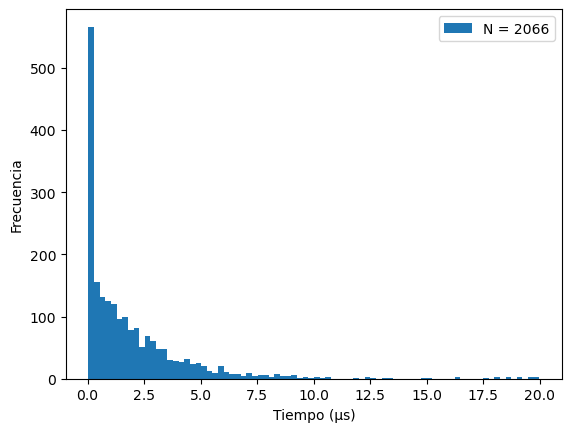

In [296]:
plt.hist(times_rawdata1, bins=80,label="N = 2066")
plt.ylabel("Frecuencia")
plt.xlabel("Tiempo (μs)")
plt.legend()
plt.show()


In [316]:
F1, N1 = np.histogram(times_rawdata1, bins=80)

C:\Users\Acer\AppData\Local\Temp\ipykernel_19756\3952923982.py:2: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-B*x)+C


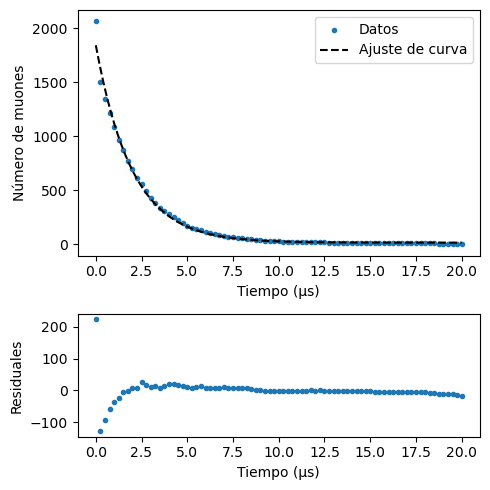

In [330]:
fig, ax = plt.subplots(2,1, figsize=(5,5),gridspec_kw={'height_ratios': [2, 1]})

time_fit1 = np.linspace(0,20,81)
time_graph1 = np.linspace(0,20,100)
muon_graph1 = np.array([len(times_rawdata1)]) 

for i in range(0, len(F1)):
    muon_graph1 = np.append(muon_graph1, muon_graph1[i] - F1[i])
    
params1, pcov1 = scipy.optimize.curve_fit(expfunction, time_fit1, muon_graph1)

residuals1 = muon_graph1 - expfunction(time_fit1,*params1)
    
ax[0].scatter(time_fit1,muon_graph1,label="Datos",marker=".")
ax[0].plot(time_graph1, expfunction(time_graph1,*params1),linestyle="--",label="Ajuste de curva",color="k")
ax[0].set_xlabel("Tiempo (μs)")
ax[0].set_ylabel("Número de muones")
ax[0].legend()

ax[1].scatter(time_fit1, residuals1, marker=".")
ax[1].set_ylabel("Residuales")
ax[1].set_xlabel("Tiempo (μs)")
plt.tight_layout()

plt.show()

In [331]:
params1, np.sqrt(np.diag(pcov1))

(array([1.82640251e+03, 5.02638895e-01, 1.67994538e+01]),
 array([2.08170748e+01, 9.90039839e-03, 4.71788627e+00]))

In [332]:
tau_obs = 1/5e-1
tau_obs

2.0

In [335]:
1e-2/(5e-1)**2

0.04

In [327]:
muon_graph1_corrected = muon_graph1 - params1[2]

In [315]:
muon_graph1_corrected

array([ 2.04517705e+03,  1.23917705e+03,  9.15177053e+02,  6.73177053e+02,
        5.05177053e+02,  3.46177053e+02,  2.60177053e+02,  1.87177053e+02,
        1.30177053e+02,  9.21770534e+01,  6.61770534e+01,  5.11770534e+01,
        3.51770534e+01,  2.11770534e+01,  1.11770534e+01,  7.17705339e+00,
        2.17705339e+00,  1.17705339e+00,  1.77053386e-01, -1.82294661e+00,
       -3.82294661e+00, -4.82294661e+00, -4.82294661e+00, -6.82294661e+00,
       -6.82294661e+00, -8.82294661e+00, -8.82294661e+00, -9.82294661e+00,
       -1.38229466e+01, -1.58229466e+01, -2.08229466e+01])

In [303]:
params2, pcov2 = scipy.optimize.curve_fit(expfunction2, time_fit1, muon_graph1)

C:\Users\Acer\AppData\Local\Temp\ipykernel_19756\3952923982.py:5: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-B*x)


In [355]:
params2, np.sqrt(np.diag(pcov2))

(array([1.82802032e+03, 4.84246873e-01]),
 array([2.19086366e+01, 8.70928466e-03]))

In [357]:
1/4.84e-01

2.066115702479339

In [358]:
0.009/(4.84e-01)**2

0.038419506864285226

In [343]:
rho,tau_plus,tau_minus = sym.symbols("rho,tau_plus,tau_minus",real=True)
#tau_plus = 2.1969
#tau_minus = 2.043
eq = sym.Eq(tau_obs, (1+rho)*tau_minus*tau_plus/(rho*tau_minus + tau_plus))

In [344]:
sym.solve(eq,rho)

[tau_plus*(2.0 - tau_minus)/(tau_minus*(tau_plus - 2.0))]

In [340]:
hbarra = 6.582119569e-25 #GeV
m = 0.10566 #GeV

In [341]:
np.sqrt(192*np.pi**3*hbarra/(m**5*tau_obs*1e-6))

1.2197386717994762e-05

In [354]:
sigma_fermi = np.sqrt(192*np.pi**3*hbarra/(m**5)) * (0.04*1e-6) *np.sqrt(1/(tau_obs*1e-6)**3)/2
sigma_fermi

1.2197386717994762e-07

In [365]:
np.sqrt(192*np.pi**3*hbarra/(m**5*2.07*1e-6))

1.1989377051192723e-05

In [359]:
np.sqrt(192*np.pi**3*hbarra/(m**5)) * (0.04*1e-6) *np.sqrt(1/(2.07*1e-6)**3)/2

1.1583939179896353e-07